# CSE 152A Fall 2022 – Assignment 4Fri

Assignment Published On: **Fri, Nov 18, 2022**

Due On: **Thur, Dec 1, 2022 11:59 PM (Pacific Time)**

Instructions:
- Attempt all questions.
- Please comment all your code adequately.
- Please write your code at the ``WRITE YOUR CODE HERE'' prompt in the .ipynb file. 

## Instructions for Google Colab
You will be running this homework on google colab which provides free GPU resources which we can use for accelerating deep learning. Google colab is an online jupyter notebook which can run code on GPU. 

To get started:

- Navigate to https://colab.research.google.com
If asked for login, sign in with any google account (your ucsd id works too).
- Upload the HW4.ipynb to colab. You can do this by `File -> upload notebook`
- Go to `Runtime -> Change run time type -> Select GPU from the dropdown`
- Connect to the instance
- All required packages are already installed in the environment. In case you would like to install a package you can simply run `!pip install <package-name>`.


### Note:
Since you will be using the free tier, you can run a notebook for a maximum of 12hrs at a stretch after which you need to reload the notebook. 
We suggest you switch to GPU instance when you need to train or test the model and use the CPU instance for running non-mathematical operations. You can switch instances between the CPU and GPU anytime using the `Runtime` menu without loss of work.

In the rare chance you don't get a GPU instance try again in 15mins and use the CPU instance until then.

# Theory Problem

## 1. Backpropogation

Please refer to "q1.png" for questions and write your answer below.

## 1. (a)

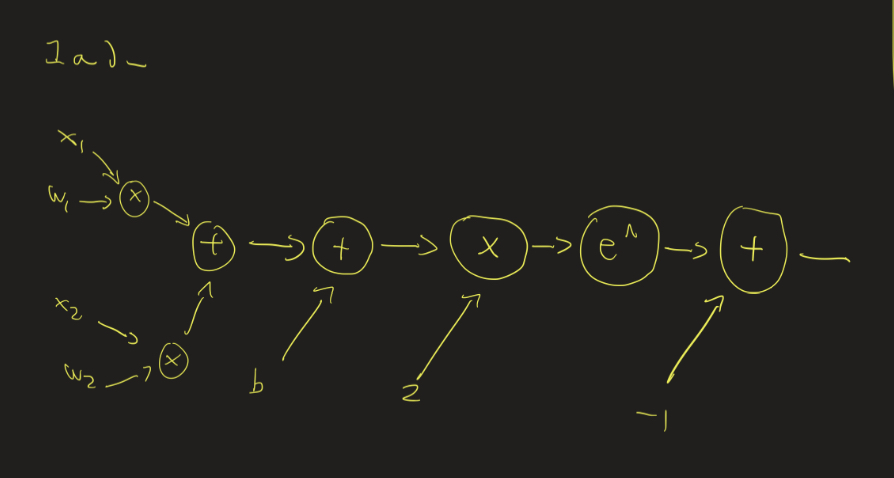

## 1. (b)

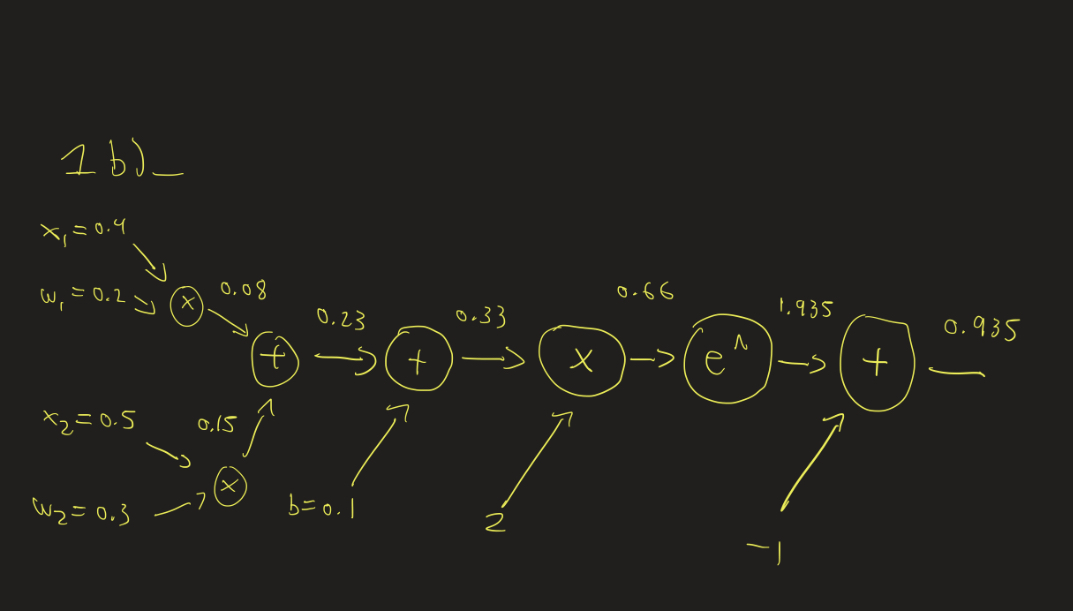

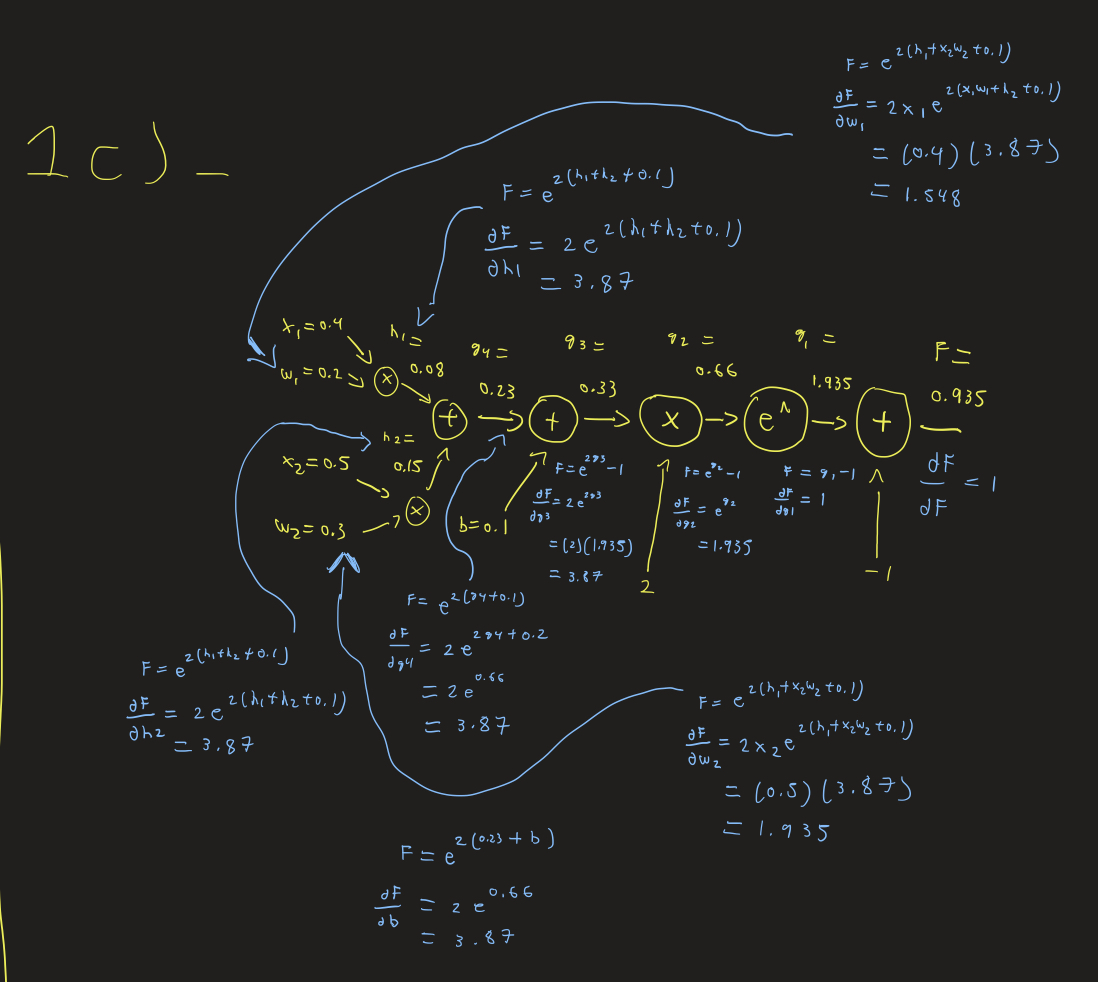## 1. (c)

## 1. (d)

First I labeled the output of every node with distinct variables up until readching the final output node (f = 0.935). From there, I moved back a node and wrote the equation of f (the final output) with respect to the output of the current node that I am at. Then I would take the partial derivative of f with respect to that output variable. I would continue this process iteratively, across the preceeding nodes, taking the equation of f that I wrote for the succeeding node and abstract it further in terms of the current output variable. then take the derivative of that.

# Programming Problem

**You need to have an enviroment with CUDA GPU to finish this homework**. If you don't have access to such environment, a good platform to look at is Google Colab, which provides a free CUDA GPU server.

**You also need to download MNIST and CIFAR-10 dataset to accomplish this homework.** The following cell is given to help you download them. It requires certain tool to be installed in your environment. You can either use this cell to download the datasets or manually download them on the corresponding websites.

In [ ]:
# Get necessary datasets; this cell only needs to be run once
!if [ -e "MNIST" ];then rm -rf "MNIST" ; fi
!if [ -e "CIFAR-10" ];then rm -rf "CIFAR-10" ; fi

!mkdir MNIST
%cd MNIST
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
!gzip -d train-images-idx3-ubyte.gz
!gzip -d train-labels-idx1-ubyte.gz
!gzip -d t10k-images-idx3-ubyte.gz
!gzip -d t10k-labels-idx1-ubyte.gz
%cd ..

!mkdir CIFAR-10
%cd CIFAR-10
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz
%cd ..

/content/MNIST
--2022-12-02 22:31:47--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.03s   

2022-12-02 22:31:47 (293 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-12-02 22:31:47--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 10

## 2. Training a small CNN for MNIST digit classification

In this problem, you will train a small convolutional neural network for image classification, using PyTorch. We will use the MNIST dataset for digit classification (http://yann.lecun.com/exdb/mnist/)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import struct
from torch.utils.data import Dataset
import random
import os
import struct
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-32-e21f0c1ed0ae>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if dataset is "training":
<ipython-input-32-e21f0c1ed0ae>:15: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif dataset is "testing":


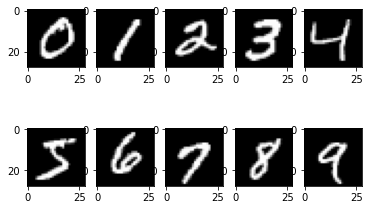

In [ ]:
# DATA PARSING
# You can manually download the data from http://yann.lecun.com/exdb/mnist/ and set path
path = "./MNIST/"

def read(dataset = "training", datatype='images'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    if(datatype=='images'):
        get_data = lambda idx: img[idx]
    elif(datatype=='labels'):
        get_data = lambda idx: lbl[idx]

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_data(i)
        
trainData=np.array(list(read('training','images')))
trainData=np.float32(np.expand_dims(trainData,-1))/255
torchTrainData=trainData.transpose((0,3,1,2))
trainLabels=np.int32(np.array(list(read('training','labels'))))

testData=np.array(list(read('testing','images')))
testData=np.float32(np.expand_dims(testData,-1))/255
torchTestData=testData.transpose((0,3,1,2))
testLabels=np.int32(np.array(list(read('testing','labels'))))

plt.figure()
for i in range(10):
    ind=np.where(trainLabels==i)[0][0]
    plt.subplot(2,5,i+1)
    plt.imshow(trainData[ind][:,:,0],cmap='gray')
plt.show()

In [ ]:
class Net(nn.Module):
    def __init__(self,drop):
        super(Net, self).__init__()
        
        # YOUR CODE HERE
        # DEFINE THE NETWORK STRUCTURE
        self.flatten = nn.Flatten()
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5,stride=1,padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5,stride=1,padding=2)
        self.fc1 = nn.Linear(3136, 1024)

        if(drop):
          self.drop = nn.Dropout(p=0.4, inplace=False)         #F.dropout2d(x,0.4)
        else:
          self.drop = None

        self.fc2 = nn.Linear(1024, 10)

        # Example: self.conv1 = nn.Conv2d(1, 3, 5,stride=1,padding=2,bias=True)
        # You can look at https://github.com/ameykusurkar/pytorch-image-classifier/blob/master/main.py for reference
        
    def forward(self, x):
        
        # YOUR CODE HERE
        x = F.max_pool2d(F.relu(self.conv1(x)),kernel_size=2,stride=2)

        x = F.max_pool2d(F.relu(self.conv2(x)),kernel_size=2,stride=2)

        x = self.flatten(x) # flatten all dimensions except the batch dimension
        
        x = F.relu(self.fc1(x))
        
        if(self.drop):
          x = self.drop(x)

        x = self.fc2(x)
        
        return x

# Print net
net = Net(drop=True)
print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)


**[ 3 points ] Define the network structure as follows**

* Convolutional layer with 32 kernels, window size 5, padding size 2, stride 1
* In place ReLU activation layer
* Max pooling layer with window size 2, stride 2
* Convolutional layer with 64 kernels, window size 5, padding size 2, stride 1
* In place ReLU activation layer
* Max pooling layer with window size 2, stride 2
* Fully connected layer with 1024 output channels
* In place ReLU activation layer
* Dropout layer with drop rate 0.4
* Fully connected layer with 10 output channels

**[ 5 points ] Complete the train function below. Use the same parameters to perform training in each of the following setups:**
* SGD for optimization, without dropout
* SGD for optimization, with dropout
* Adam for optimization, without dropout
* Adam for optimization, with dropout.

As evaluation for each case above, perform the following:
* Plot the loss graph and the accuracy graph on training set on the same plot
* Print the accuracy on test set

Test accuracies are expected to be quite high (~98 %)

In [ ]:
# CODE BELOW IS AN EXAMPLE STARTER
# FEEL FREE TO EDIT ANYTHING

# to_train is a parameter that determines what part of the net to train
# it is not required for this question, but will be useful in the next one
def train(tdata,tlabel,net,to_train,opt,user_batch,user_epochs,user_lr):
    criterion = nn.CrossEntropyLoss() #this is our loss function
    losslist = []
    acclist=[]
    
    # Change parameters as required
    epochs=user_epochs #default 15
    batch=user_batch #default 200
    learning_rate=user_lr #default 1e-3
    
    #this is where we determine our optimizer:
    if(opt=='adam'):
        optimizer = optim.Adam(to_train,lr=learning_rate)
    else:
        optimizer = optim.SGD(to_train,lr=learning_rate,momentum = 0.99)
        
    for k in tqdm(range(epochs)): #for 15 epochs
        for l in range(int(len(tdata)/batch)): # something over 200
            inds=np.random.randint(0,len(tdata)-1,batch)
            inputs = Variable(torch.FloatTensor(tdata[inds]).cuda())
            targets = Variable(torch.LongTensor(tlabel[inds]).cuda())
            
            # YOUR CODE HERE
            # Train the model using the optimizer and the batch data
            # Append the loss and accuracy to the losslist and acclist arrays

            optimizer.zero_grad()
            outputs = net(inputs)

            loss = nn.functional.cross_entropy(outputs, targets) #tis a tensor, great!
            #loss = criterion(outputs, targets) #tis a tensor, great!

            #loss.requires_grad = True
            loss.backward()
            optimizer.step()

            acc=np.mean(np.argmax(outputs.data.cpu().numpy(),1)==tlabel[inds])
            acclist.append(acc)


            loss_cpu = loss.data.cpu().numpy()

            losslist.append(loss_cpu)

    return losslist,acclist

def test(tdata,tlabel,net):
    inputs = Variable(torch.FloatTensor(tdata).cuda())
    targets = Variable(torch.LongTensor(tlabel).cuda())
    prediction = net(inputs)
    acc=np.mean(np.argmax(prediction.data.cpu().numpy(),1)==tlabel)

    return acc

100%|██████████| 15/15 [00:32<00:00,  2.15s/it]


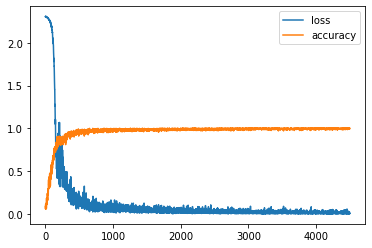

Accuracy:0.9905


In [ ]:
# Example code 

net = Net(drop=False).cuda()
loss,acc=train(torchTrainData,trainLabels,net,net.parameters(),'sgd',200,15,1e-3)
ax=range(len(loss))
plt.plot(ax,loss,ax,acc)
plt.legend(['loss','accuracy'])
plt.show()
print('Accuracy:{}'.format(test(torchTestData,testLabels,net))) #is this 9% bc I haven't trained the net?

# YOUR CODE HERE

100%|██████████| 15/15 [00:32<00:00,  2.17s/it]


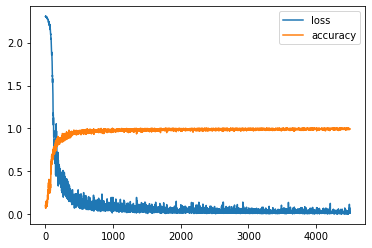

Accuracy:0.9896


In [ ]:
net = Net(drop=True).cuda()
loss,acc=train(torchTrainData,trainLabels,net,net.parameters(),'sgd',200,15,1e-3)
ax=range(len(loss))
plt.plot(ax,loss,ax,acc)
plt.legend(['loss','accuracy'])
plt.show()
print('Accuracy:{}'.format(test(torchTestData,testLabels,net)))

100%|██████████| 15/15 [00:35<00:00,  2.39s/it]


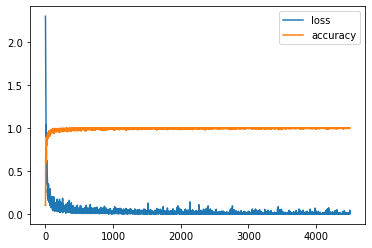

Accuracy:0.9918


In [ ]:
net = Net(drop=False).cuda()
loss,acc=train(torchTrainData,trainLabels,net,net.parameters(),'adam',200,15,1e-3)
ax=range(len(loss))
plt.plot(ax,loss,ax,acc)
plt.legend(['loss','accuracy'])
plt.show()
print('Accuracy:{}'.format(test(torchTestData,testLabels,net)))

100%|██████████| 15/15 [00:36<00:00,  2.43s/it]


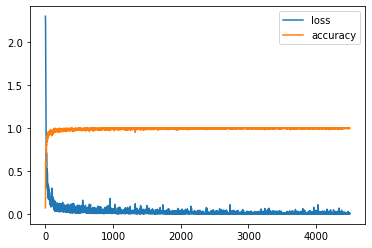

Accuracy:0.9931


In [ ]:
net = Net(drop=True).cuda()
loss,acc=train(torchTrainData,trainLabels,net,net.parameters(),'adam',200,15,1e-3)
ax=range(len(loss))
plt.plot(ax,loss,ax,acc)
plt.legend(['loss','accuracy'])
plt.show()
print('Accuracy:{}'.format(test(torchTestData,testLabels,net)))

**[ 5 points ] Plot the following graphs and comment on them**

* Training loss graphs of SGD−dropout and Adam−dropout on the same plot 
* Training loss graphs for Adam-dropout for 3 different values of batch size such that there is some difference in the graphs, on the same plot

100%|██████████| 15/15 [00:36<00:00,  2.42s/it]


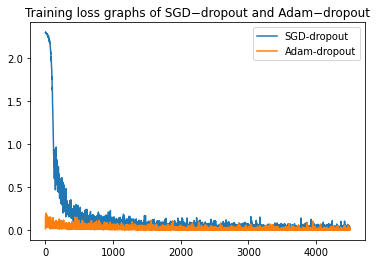

Accuracy:0.9919


In [ ]:
net = Net(drop=True).cuda()
loss_1,acc_1=train(torchTrainData,trainLabels,net,net.parameters(),'sgd',200,15,1e-3)
loss_2,acc_2=train(torchTrainData,trainLabels,net,net.parameters(),'adam',200,15,1e-3)
ax=range(len(loss_1))

plt.plot(ax,loss_1,ax,loss_2)
plt.title("Training loss graphs of SGD−dropout and Adam−dropout")
plt.legend(['SGD-dropout','Adam-dropout'])
plt.show()
print('Accuracy:{}'.format(test(torchTestData,testLabels,net))) 

It appears that the training loss has a steeper decline for SGD-dropout during the first ~500 iterations. While the SGD-dropout loss eventually approximates the Adam-dropout loss, the Adam-dropout loss appears to consistently maintain smaller losses throughout all iterations.


100%|██████████| 15/15 [00:32<00:00,  2.15s/it]


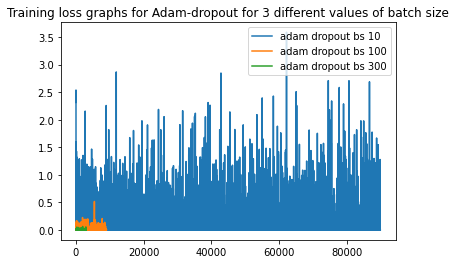

Accuracy:0.9915


In [ ]:
# YOUR CODE HERE

net = Net(drop=True).cuda()
loss1,acc1=train(torchTrainData,trainLabels,net,net.parameters(),'adam',10,15,1e-3)
loss2,acc2=train(torchTrainData,trainLabels,net,net.parameters(),'adam',100,15,1e-3)
loss3,acc3=train(torchTrainData,trainLabels,net,net.parameters(),'adam',300,15,1e-3)
ax1=range(len(loss1))
ax2=range(len(loss2))
ax3=range(len(loss3))
plt.plot(ax1,loss1,ax2,loss2,ax3,loss3)
plt.title("Training loss graphs for Adam-dropout for 3 different values of batch size")
plt.legend(['adam dropout bs 10','adam dropout bs 100', 'adam dropout bs 300'])
plt.show()
print('Accuracy:{}'.format(test(torchTestData,testLabels,net))) 

With a batch size of 10, Adam-dropout produces significantly larger losses than when implemented with the other two batch sizes. The losses when the batch size is 100 are much smaller in comparison, yet these losses are not the smallest possible: using a batch size of 300 produces even smaller losses than with a batch size of 100. However, it is likely that both batch sizes converge after the ~10000th iteration, which is where both loss trends become much smaller to make out.

**[ 2 points ] Plot the training loss graphs for changes made in any particular parameter (learning rate/momentum etc) such that there is a clear difference in the graphs, on the same plot, and comment.**

100%|██████████| 80/80 [02:34<00:00,  1.93s/it]


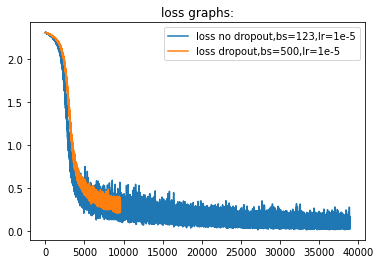

Accuracy:0.9916


In [ ]:
# YOUR CODE HERE
net4 = Net(drop=False).cuda()
net5 = Net(drop=True).cuda()
loss4,acc4=train(torchTrainData,trainLabels,net4,net4.parameters(),'sgd',123,80,1e-5)
loss5,acc5=train(torchTrainData,trainLabels,net5,net5.parameters(),'sgd',500,80,1e-5)

ax4=range(len(loss4))
ax5=range(len(loss5))

plt.plot(ax4,loss4,ax5,loss5)
plt.title("loss graphs:")
plt.legend(['loss no dropout,bs=123,lr=1e-5','loss dropout,bs=500,lr=1e-5'])
plt.show()
print('Accuracy:{}'.format(test(torchTestData,testLabels,net))) 

With only a difference in batch sizes and use of dropout, it looks like the plot with bs=123 follows a similar decline behavior to that the plot with bs=500, although during the interval ~[0,5000] it appears that losses for bs=500 are higher than for bs=123. One thing worth noting is that although the losses of bs=500 appear to be smaller at each iteration within [5000,10000], the use of the dropout layer in bs=500 could hardly be affecting the duration and behavior of this function. This is due to dropout having a significant effect on accuracy during more complex tasks where overfitting may be more likely, but since we are dealing with a relatively simple task, we can still expect a high accuracy as an answer

In [ ]:
###############################  QUESTION 3  ##############################################

## 3. Transfer learning

You will now visualize the effects of transfer learning by performing experiments using the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html) . Note that this is just to understand how transfer learning works, in practice it is generally used with very large datasets and complex networks

In [ ]:
# DATA PARSING
# You can manually download the data from from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz and set path
path='./CIFAR-10/cifar-10-batches-py/'
data=np.zeros((0,32,32,3))
labels=[]
for i in range(1,6):
    with open(path+'data_batch_'+str(i), 'rb') as fo:
        dat = pickle.load(fo,encoding='latin1')
        r=dat['data'][:,:1024*1].reshape((10000,32,32,1))
        g=dat['data'][:,1024:2048].reshape((10000,32,32,1))
        b=dat['data'][:,2048:3072].reshape((10000,32,32,1))
        rgb=np.concatenate((r,g,b),axis=3)
        data=np.vstack((data,np.float32(rgb)/255))
        labels+=dat['labels']
labels=np.array(labels)
# data -> 50000 X 32 X 32 X 3 array with training data
# labels -> 50000 labels ranging from 0 to 9

 **[ 2 points ] Plot 3 random images corresponding to each label from the training data**


In [ ]:
# YOUR CODE HERE #

In [ ]:
# Split the data and labels into 2 sets, first one containing labels 0 to 4, and second one from 5 to 9. 

data1=np.zeros((0,32,32,3))
labels1=[]
data2=np.zeros((0,32,32,3))
labels2=[]
for i in range(5):
    x=data[labels==i]
    #print("i: "+str(i))
    #print(x)
    data1=np.vstack((data1,x))
    labels1+=[i]*len(x)
for i in range(5,10):
    x=data[labels==i]
    data2=np.vstack((data2,x))
    labels2+=[i-5]*len(x)
    
labels1=np.array(labels1)
labels2=np.array(labels2)

torch_data1=data1.transpose((0,3,1,2))
torch_data2=data2.transpose((0,3,1,2))

In [ ]:
images1 = []

for i in range(0, 5):

  x1=data1[labels1==i]
  idx1_r1 = random.randint(0, len(x1))
  idx2_r1 = random.randint(0, len(x1))
  idx3_r1 = random.randint(0, len(x1))

  img1_r1 = x1[idx1_r1]
  img2_r1 = x1[idx2_r1]
  img3_r1 = x1[idx3_r1]

  images1.append(img1_r1)
  images1.append(img2_r1)
  images1.append(img3_r1)

images2 = []

for i in range(0, 5):
  x2=data2[labels2==i]
  idx1_r2 = random.randint(0, len(x2))
  idx2_r2 = random.randint(0, len(x2))
  idx3_r2 = random.randint(0, len(x2))

  img1_r2 = x1[idx1_r2]
  img2_r2 = x1[idx2_r2]
  img3_r2 = x1[idx3_r2]

  images2.append(img1_r2)
  images2.append(img2_r2)
  images2.append(img3_r2)



In [ ]:
print(len(images2))

15


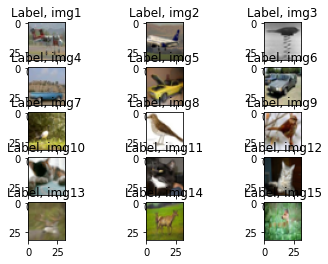

In [ ]:
fig = plt.figure()

#half = int(len(images1)/2)

#fig = plt.figure()

for i in range(0, len(images1)):
  ax = fig.add_subplot(5,3,i+1)
  ax.imshow(images1[i])

  ax.title.set_text('Label, img'+str(i+1))

plt.show()


Rows 0-4: labels 0-4 respectively

<Figure size 432x288 with 0 Axes>

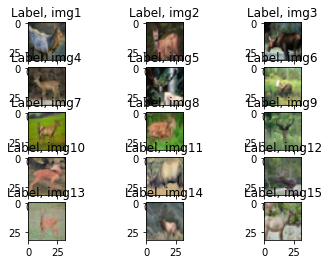

In [ ]:
fig = plt.figure()

#half = int(len(images1)/2)

fig = plt.figure()

for i in range(0, len(images2)):
  ax = fig.add_subplot(5,3,i+1)
  ax.imshow(images2[i])

  ax.title.set_text('Label, img'+str(i+1))

plt.show()

Rows 0-4: labels 5-9 respectively

**[ 3 points ] Create a simple convolutional network to classify the training data. The network structure should be as follows:**
1. Layer 1 - Kernel size 4, Stride 2, Output channels 5, Bias enabled, Relu activation
2. Layer 2 - Kernel size 4, Stride 1, Output channels 10, Bias enabled, Relu avtication
3. Layer 3 - Kernel size 4, Stride 1, Output channels 20, Bias enabled, Relu activation
4. Layer 4 - Kernel size 4, Stride 1, Output channels 40, Bias enabled, Relu activation
5. Layer 5 - Fully connected layer with 5 outputs

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # YOUR CODE HERE
        self.flatten = nn.Flatten()
        self.conv1 = nn.Conv2d(3, 5, kernel_size=4,stride=2,bias=True)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(5, 10, kernel_size=4,stride=1,bias=True)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(10, 20, kernel_size=4,stride=1,bias=True)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(20, 40, kernel_size=4,stride=1,bias=True)
        self.relu4 = nn.ReLU()
        self.fc1 = nn.Linear(1440, 5)
        
    def forward(self, x):
        
        # YOUR CODE HERE
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.flatten(x)
        #print("flattened:")
        #print(x.shape)
        x = self.fc1(x)
        
        return x
    
net = Net()
print(net)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv1): Conv2d(3, 5, kernel_size=(4, 4), stride=(2, 2))
  (relu1): ReLU()
  (conv2): Conv2d(5, 10, kernel_size=(4, 4), stride=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(10, 20, kernel_size=(4, 4), stride=(1, 1))
  (relu3): ReLU()
  (conv4): Conv2d(20, 40, kernel_size=(4, 4), stride=(1, 1))
  (relu4): ReLU()
  (fc1): Linear(in_features=1440, out_features=5, bias=True)
)


**[ 5 points ] Complete the train function below and follow the instructions** 

* Initialize the network, train the complete network (net.parameters) on data1 (The first 5 classes)
* Plot the loss and accuracy graphs over training on the same plot
* Print the final training accuracy as well**

Set the learning rate, number of iterations and batch size such that the loss is gradually and smoothly decreasing and converging. The accuracy at the end of training must be around or greater than 60 %.

In [ ]:
# to_train can be net.paramaters OR net.fc.parameters OR net.conv1.parameters so that only certain parts of the net are trained
def train(tdata,tlabel,net,to_train):
    criterion = nn.CrossEntropyLoss()
    losslist = []
    acclist=[]
    
    # Change as required
    epochs=5
    batch=100
    learning_rate=1e-3
    optimizer = optim.Adam(to_train,lr=learning_rate)
    
    for k in tqdm(range(epochs)):
        for l in range(int(len(tdata)/batch)):
            inds=np.random.randint(0,len(tdata)-1,batch)
            inputs = Variable(torch.FloatTensor(tdata[inds]).cuda())
            targets = Variable(torch.LongTensor(tlabel[inds]).cuda())
            
            # YOUR CODE HERE

            optimizer.zero_grad()
            outputs = net(inputs)
           
            loss = nn.functional.cross_entropy(outputs, targets)
            loss.backward()
            optimizer.step()

            acc=np.mean(np.argmax(outputs.data.cpu().numpy(),1)==tlabel[inds])
            acclist.append(acc)

            loss_cpu = loss.data.cpu().numpy()
            losslist.append(loss_cpu)

    return losslist,acclist

In [ ]:
def test(tdata,tlabel,net):
    inputs = Variable(torch.FloatTensor(tdata).cuda())
    targets = Variable(torch.LongTensor(tlabel).cuda())
    prediction = net(inputs)
    acc=np.mean(np.argmax(prediction.data.cpu().numpy(),1)==tlabel)

    return acc

100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

1250


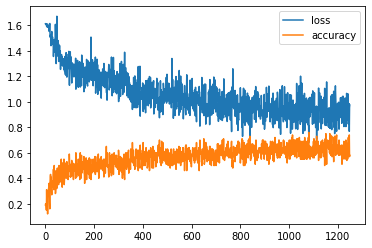

Accuracy:0.64332


In [ ]:
# YOUR CODE HERE #

net = Net().cuda()

loss1d1,acc1d1=train(torch_data1,labels1,net,net.parameters())

print(len(loss1d1))

ax1d1=range(len(loss1d1))
plt.plot(ax1d1,loss1d1,ax1d1,acc1d1)
plt.legend(['loss','accuracy'])
plt.show()
print('Accuracy:{}'.format(test(torch_data1,labels1,net)))


**[ 2 points ] Without reinitializing the network, train only the fully connected layer (net.fc.parameters) now on data2 (The next 5 classes)** 

Do not change any hyper parameters such as learning rate or batch size. Plot the loss and accuracy and print the final values like before.

100%|██████████| 5/5 [00:04<00:00,  1.02it/s]


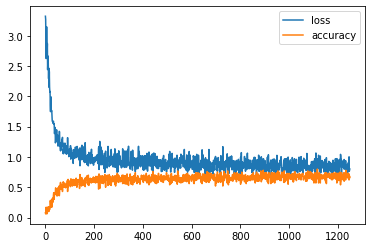

Accuracy:0.67548


In [ ]:
# YOUR CODE HERE #
loss1d2,acc1d2=train(torch_data2,labels2,net,net.fc1.parameters())
ax1d2=range(len(loss1d2))
plt.plot(ax1d2,loss1d2,ax1d2,acc1d2)
plt.legend(['loss','accuracy'])
plt.show()
print('Accuracy:{}'.format(test(torch_data2,labels2,net)))

**[ 3 points ] Now repeat the process in the opposite order** 

* Initialize the net again, train the whole network on data2, generate the same plots as before
* Then without reinitializing the net, train only the fully connected layer on data1 and generate the plots

Do not change any hyperparameters.

100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


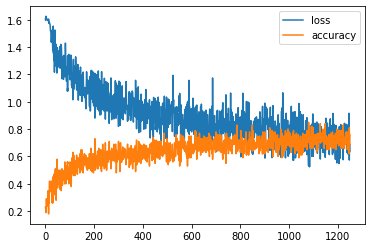

Accuracy:0.73768


In [ ]:
# YOUR CODE HERE #
net = Net().cuda()
loss2d2,acc2d2=train(torch_data2,labels2,net,net.parameters())

ax2d2=range(len(loss2d2))
plt.plot(ax2d2,loss2d2,ax2d2,acc2d2)
plt.legend(['loss','accuracy'])
plt.show()
print('Accuracy:{}'.format(test(torch_data2,labels2,net)))

100%|██████████| 5/5 [00:04<00:00,  1.03it/s]


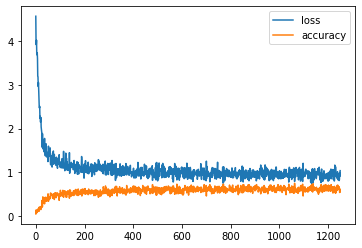

Accuracy:0.62252


In [ ]:
loss2d1,acc2d1=train(torch_data1,labels1,net,net.fc1.parameters())
ax2d1=range(len(loss2d1))
plt.plot(ax2d1,loss2d1,ax2d1,acc2d1)
plt.legend(['loss','accuracy'])
plt.show()
print('Accuracy:{}'.format(test(torch_data1,labels1,net)))

**[ 5 points ]**

* Plot the loss vs iterations for the classifers trained to classify data1, via normal learning as well as transfer learning, on the same plot
* Plot another graph for the classifiers trained to classify data2

Explain the results obtained, based on the training regimen. Comment on why transfer learning worked/didn't work.

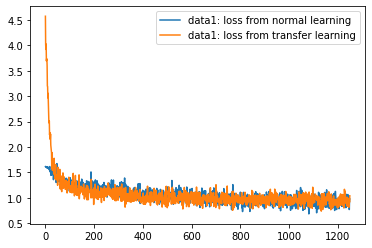

In [ ]:
# YOUR CODE HERE #
ax=range(len(loss2d1))
plt.plot(ax,loss1d1,ax,loss2d1)
plt.legend(['data1: loss from normal learning','data1: loss from transfer learning'])
plt.show()

During the first 50 or so iterations there was a steep decline in the loss from transfer learning. However, the loss from transfer learning over the next iterations follows a very similar trend to that of normal learning. In the long run, it seems like the losses produced by transfer learning are not much lower than those of normal learning, therefore it might not have worked well for this dataset.

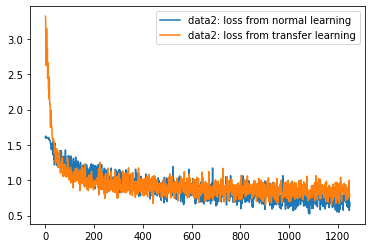

In [ ]:
ax=range(len(loss1d2))
plt.plot(ax,loss2d2,ax,loss1d2)
plt.legend(['data2: loss from normal learning','data2: loss from transfer learning'])
plt.show()

The loss from transfer learning is significantly large during the first ~50 iterations, but it seems to decrease beyond the normal learning losses after the ~50th and before the ~500th iterations. After that, the transfer learning loss almost appears to match the normal loss until the ~700th loss, from which the transfer loss slowly starts to increase beyond the normal loss. For those first ~500 iterations, transfer learning seems to have worked well, although probably not so much in the long run.

Create a network with more layers, pooling layers, and more filters and try to increase accuracy as much as possible. Play around with the hyperparameters to understand how they affect the training process. No need to turn in anything for this.